In [1]:
import pandas as pd
import numpy as np

path = "../Lectures/examples/"

In [2]:
pd.read_table(path + "ex1.csv", sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### 인덱스 지정

In [3]:
pd.read_csv(path + "ex2.csv",
            header=None,
            names = ['a', 'b', 'c',' d', 'msg'],
            index_col=4) # index_col4 == index_col='msg'

,a,b,c,d
msg,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


### 계층적 인덱스

```python
pd.read_csv(path + "csv_mindex.csv", index_col = ['key1', 'key2'])
pd.read_csv(path + "csv_mindex.csv", index_col = [0, 1])
```


In [4]:
pd.read_csv(path + "csv_mindex.csv")

,key1,key2,value1,value2
0,one,a,1,2
1,one,b,3,4
2,one,c,5,6
3,one,d,7,8
4,two,a,9,10
5,two,b,11,12
6,two,c,13,14
7,two,d,15,16


In [5]:
pd.read_csv(path + "csv_mindex.csv", index_col = ['key1', 'key2'])

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [6]:
pd.read_csv(path + "ex3.txt", sep=r"\s+")

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


### 행 skip

In [7]:
pd.read_csv(path + "ex4.csv")

,,,,# hey!
a,b,c,d,message
# just wanted to make things more difficult for you,NaN,NaN,NaN,NaN
# who reads CSV files with computers,anyway?,NaN,NaN,NaN
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [8]:
pd.read_csv(path + "ex4.csv", skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### NaN
* 파일을 읽어들일 때 값이 없을 경우 NaN으로 채운다

In [9]:
res = pd.read_csv(path + "ex5.csv")
res

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [10]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   something  3 non-null      object 
 1   a          3 non-null      int64  
 2   b          3 non-null      int64  
 3   c          2 non-null      float64
 4   d          3 non-null      int64  
 5   message    2 non-null      object 
dtypes: float64(1), int64(3), object(2)
memory usage: 272.0+ bytes


In [11]:
pd.isnull(res)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


`'NULL' == NA == ''`

In [12]:
# pd.read_csv(path + "ex5.csv", na_values={'NULL'})
pd.read_csv(path + "ex5.csv", na_values={1, 'two', 'one'})

,something,a,b,c,d,message
0,NaN,NaN,2,3.0,4,NaN
1,NaN,5.0,6,NaN,8,world
2,three,9.0,10,11.0,12,foo


In [13]:
pd.read_csv(path + "ex5.csv", na_values={'foo', 'two'})

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


In [14]:
pd.read_csv(path + "ex5.csv",
            na_values={
                'message': 'foo', 
                'something': ['two', 'three']
            })

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,NaN,9,10,11.0,12,NaN


### 파일 일부만 읽기

In [15]:
res = pd.read_csv(path + "ex6.csv", nrows=5)
res

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


### 파일을 나누어서 읽기

In [16]:
chunker = pd.read_csv(path + "ex6.csv", chunksize=1000)

In [17]:
tot = pd.Series([], dtype=float)
for chunk in chunker:
    tot = tot.add(chunk['key'].value_counts(), fill_value=0)
    
tot.sort_values(ascending=False)

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
V    328.0
I    327.0
U    326.0
P    324.0
D    320.0
A    320.0
R    318.0
Y    314.0
G    308.0
S    308.0
N    306.0
W    305.0
T    304.0
B    302.0
Z    288.0
C    286.0
4    171.0
6    166.0
7    164.0
8    162.0
3    162.0
5    157.0
2    152.0
0    151.0
9    150.0
1    146.0
dtype: float64

### 데이터프레임 내보내기

In [18]:
data = pd.read_csv(path + "ex5.csv")
data.to_csv(path + "out.csv", index=None)

In [19]:
pd.read_csv(path + "out.csv")

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [20]:
data.to_csv(path + "out.csv", sep='|', index=None)

In [21]:
pd.read_csv(path + "out.csv")

,something|a|b|c|d|message
0,one|1|2|3.0|4|
1,two|5|6||8|world
2,three|9|10|11.0|12|foo


In [22]:
pd.read_csv(path + "out.csv", sep='|')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [23]:
data.to_csv(path + "out.csv", na_rep="누락", index=None)
pd.read_csv(path + "out.csv")

,something,a,b,c,d,message
0,one,1,2,3.0,4,누락
1,two,5,6,누락,8,world
2,three,9,10,11.0,12,foo


In [24]:
data.to_csv(path + "out.csv", na_rep="누락", index=None, header=None)
pd.read_csv(path + "out.csv")

,one,1,2,3.0,4,누락
0,two,5,6,누락,8,world
1,three,9,10,11.0,12,foo


In [25]:
pd.read_csv(path + "out.csv", header=None)

,0,1,2,3,4,5
0,one,1,2,3.0,4,누락
1,two,5,6,누락,8,world
2,three,9,10,11.0,12,foo


In [26]:
data.to_csv(path + "out.csv", index=None, header=None, columns=['a', 'b', 'c'])
pd.read_csv(path + "out.csv", names=['a', 'b', 'c'])

,a,b,c
0,1,2,3.0
1,5,6,NaN
2,9,10,11.0


### 날짜 데이터

In [27]:
dates = pd.date_range("8/1/2020", periods=7)
dates

DatetimeIndex(['2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04',
               '2020-08-05', '2020-08-06', '2020-08-07'],
              dtype='datetime64[ns]', freq='D')

In [28]:
pd.Series(dates)

0   2020-08-01
1   2020-08-02
2   2020-08-03
3   2020-08-04
4   2020-08-05
5   2020-08-06
6   2020-08-07
dtype: datetime64[ns]

In [29]:
ts = pd.Series(np.arange(7), index=dates)
ts.to_csv("tseries.csv")

In [30]:
dates = pd.read_csv(path + "tseries.csv", header=None, index_col=0)
dates.index.name = None
dates

,1
2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6


In [31]:
import os
import json
import matplotlib.pyplot as plt

np.random.seed(123)
for line in open("example.txt"):
    print(line)

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }

{ "a": "GoogleMaps\/RochesterNY", "c": "US", "nk": 0, "tz": "America\/Denver", "gr": "UT", "g": "mwszkS", "h": "mwszkS", "l": "bitly", "hh": "j.mp", "r": "http:\/\/www.AwareMap.com\/", "u": "http:\/\/www.monroecounty.gov\/etc\/911\/rss.php", "t": 1331923249, "hc": 1308262393, "cy": "Provo", "ll": [ 40.218102, -111.613297 ] }

{ "a": "Mozilla\/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident\/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; Inf


{ "a": "Mozilla\/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident\/4.0; .NET CLR 2.0.50727; .NET CLR 1.1.4322; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729; MS-RTC LM 8)", "c": "US", "nk": 1, "tz": "America\/Los_Angeles", "gr": "CA", "g": "yR36fW", "h": "Awl8zA", "l": "usagovteam", "al": "en-us", "hh": "1.usa.gov", "r": "http:\/\/t.co\/e4wnuwcl", "u": "http:\/\/blog.usa.gov\/post\/19240063355\/winter-cold-or-spring-allergies", "t": 1331924830, "hc": 1331833006, "cy": "Sacramento", "ll": [ 38.576500, -121.444504 ] }

{ "a": "Mozilla\/4.0 (compatible; MSIE 8.0; Windows NT 6.1; Trident\/4.0)", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "CT", "g": "hWO2vB", "h": "e00XxB", "l": "msh46", "hh": "bit.ly", "r": "direct", "u": "http:\/\/www.bls.gov\/cps\/cpsdisability.htm\/", "t": 1331924831, "hc": 1291725139, "cy": "Hamden", "ll": [ 41.382000, -72.917099 ] }

{ "a": "Mozilla\/4.0 (compatible; MSIE 8.0; Windows NT 6.1; Trident\/4.0)", "c": "US", "nk": 1, "tz": "America\/New_York", "gr

{ "a": "Mozilla\/5.0 (Windows NT 5.1) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.79 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "DC", "g": "A2q9Ff", "h": "A2q9Ff", "l": "bitly", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/t.co\/vvF7al0H", "u": "http:\/\/www.whitehouse.gov\/blog\/2012\/01\/31\/ending-overpayment-federal-contractor-executives", "t": 1331926447, "hc": 1328016902, "cy": "Washington", "ll": [ 38.952000, -77.019997 ] }

{ "a": "Mozilla\/5.0 (Macintosh; Intel Mac OS X 10_7_2) AppleWebKit\/534.52.7 (KHTML, like Gecko) Version\/5.1.2 Safari\/534.52.7", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "NJ", "g": "vNJS4H", "h": "u0uD9q", "l": "o_4us71ccioa", "al": "en-us", "hh": "1.usa.gov", "r": "direct", "u": "https:\/\/www.nysdot.gov\/rexdesign\/design\/community.gif", "t": 1331926447, "hc": 1319563556, "cy": "Clementon", "ll": [ 39.801800, -75.008003 ] }

{ "a": "Mozilla\/5.0 (X11; Ubuntu; Linux x86_64; rv:10.0.2) Geck

In [32]:
records = [json.loads(line) for line in open("example.txt", encoding='utf-8')]
records[0]['tz']

'America/New_York'

In [33]:
time_zones = [record["tz"] for record in records if "tz" in record]

In [34]:
len(time_zones)

3440

In [35]:
def get_counts(seq):
    counts = {}
    for x in seq:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
            
    return counts

time_zone_counts = get_counts(time_zones)

In [36]:
def top_counts(seq, n=10):
    top = sorted(seq.items(), key=lambda kv:kv[1], reverse=True)
    lis = []
    for i in range(n):
        lis.append((top[i][1], top[i][0]))

    return lis

top_counts(time_zone_counts)

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]

In [37]:
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [38]:
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [39]:
frame['tz'].value_counts()

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
                                  ... 
Asia/Kuching                         1
America/Lima                         1
America/Argentina/Buenos_Aires       1
America/Santo_Domingo                1
Asia/Manila                          1
Name: tz, Length: 97, dtype: int64

In [40]:
frame['tz'].value_counts()['America/Denver']

191

In [41]:
frame['tz'].isnull().value_counts()

False    3440
True      120
Name: tz, dtype: int64

In [42]:
clean_tz = frame['tz'].fillna("누락")
clean_tz[clean_tz == ''] = "알수없음"

In [43]:
clean_tz.value_counts()[:10]

America/New_York       1251
알수없음                    521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
누락                      120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<AxesSubplot:>

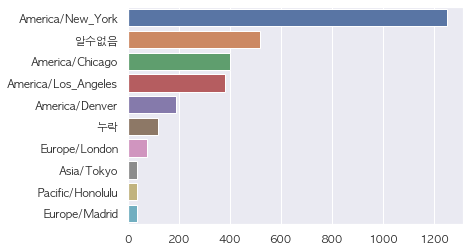

In [44]:
import seaborn as sns

sns.set(font="AppleGothic") # 한글 깨짐 방지
subset = clean_tz.value_counts()[:10]
sns.barplot(x=subset.values, y=subset.index)

In [45]:
frame['a'][51][:50]
frame.a[51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [46]:
frame[frame['a'].isnull()]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331923e+09,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331923e+09,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331923e+09,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331923e+09,NaN
163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331923e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331927e+09,NaN
3467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331927e+09,NaN
3499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331927e+09,NaN
3518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331927e+09,NaN


In [47]:
result = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [48]:
result.value_counts()

Mozilla/5.0                                          2594
Mozilla/4.0                                           601
GoogleMaps/RochesterNY                                121
Opera/9.80                                             34
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         21
Mozilla/6.0                                             5
BlackBerry8520/5.0.0.681                                4
Dalvik/1.4.0                                            3
BlackBerry8520/5.0.0.592                                3
Goldfire                                                2
Acoon                                                   2
BlackBerry9630/5.0.0.975                                2
Socialite/7766                                          2
BlackBerry8530/5.0.0.654                                1
sometrik.com                                            1
Opera/9.00                                              1
Opera/9.50    

In [49]:
frame[frame['a'].notnull()]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [50]:
cframe = frame[frame['a'].notnull()].copy()

In [51]:
cframe['os'] = np.where(cframe.a.str.contains("Windows"), "Windows", "Not Windows")

In [52]:
cframe['os'].value_counts(dropna=False)

Windows        2246
Not Windows    1194
Name: os, dtype: int64

In [53]:
df = pd.DataFrame({"email": ["happy@gmail.com",
                             "1004@daum.net",
                             "mouse@yahoo.co.kr"]})
df

,email
0,happy@gmail.com
1,1004@daum.net
2,mouse@yahoo.co.kr


In [54]:
df[df.email.str.startswith(pat='h')]
df[df.email.str.endswith(pat='com')]

,email
0,happy@gmail.com


## Groupby

In [55]:
cframe

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Not Windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN,Windows
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN,Windows
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN,Not Windows


In [56]:
by_tz = cframe.groupby(['tz'])
by_tz

In [57]:
by_tz.size()

tz
                       521
Africa/Cairo             3
Africa/Casablanca        1
Africa/Ceuta             2
Africa/Johannesburg      1
                      ... 
Europe/Volgograd         1
Europe/Warsaw           16
Europe/Zurich            4
Pacific/Auckland        11
Pacific/Honolulu        36
Length: 97, dtype: int64

In [58]:
by_tz = cframe.groupby(['os'])
by_tz.size()

os
Not Windows    1194
Windows        2246
dtype: int64

In [59]:
by_tz_os = cframe.groupby(['tz', 'os'])
by_tz_os.size()

tz                 os         
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64

### unstack()
* groupby()의 [:-1]이 행, [-1]이 열


In [60]:
by_tz_os.size().unstack()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,NaN,3.0
Africa/Casablanca,NaN,1.0
Africa/Ceuta,NaN,2.0
Africa/Johannesburg,NaN,1.0
...,...,...
Europe/Volgograd,NaN,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,NaN


In [61]:
by_tz_os = cframe.groupby(['tz', 'c', 'os'])
by_tz_os.size().unstack()

,os,Not Windows,Windows
tz,c,,
Africa/Cairo,EG,NaN,3.0
Africa/Casablanca,MA,NaN,1.0
Africa/Ceuta,ES,NaN,2.0
Africa/Johannesburg,ZA,NaN,1.0
Africa/Lusaka,ZM,NaN,1.0
...,...,...,...
Europe/Volgograd,RU,NaN,1.0
Europe/Warsaw,PL,1.0,15.0
Europe/Zurich,CH,4.0,NaN


In [62]:
aggCounts = by_tz_os.size().unstack().fillna(0)
aggCounts

,os,Not Windows,Windows
tz,c,,
Africa/Cairo,EG,0.0,3.0
Africa/Casablanca,MA,0.0,1.0
Africa/Ceuta,ES,0.0,2.0
Africa/Johannesburg,ZA,0.0,1.0
Africa/Lusaka,ZM,0.0,1.0
...,...,...,...
Europe/Volgograd,RU,0.0,1.0
Europe/Warsaw,PL,1.0,15.0
Europe/Zurich,CH,4.0,0.0


In [63]:
aggCounts.sum()

os
Not Windows     949.0
Windows        1970.0
dtype: float64

In [64]:
aggCounts.sum(axis=1)

tz                   c 
Africa/Cairo         EG     3.0
Africa/Casablanca    MA     1.0
Africa/Ceuta         ES     2.0
Africa/Johannesburg  ZA     1.0
Africa/Lusaka        ZM     1.0
                           ... 
Europe/Volgograd     RU     1.0
Europe/Warsaw        PL    16.0
Europe/Zurich        CH     4.0
Pacific/Auckland     NZ    11.0
Pacific/Honolulu     US    36.0
Length: 96, dtype: float64

In [65]:
aggCounts.sum(1).nlargest(10)

tz                   c 
America/New_York     US    1251.0
America/Chicago      US     400.0
America/Los_Angeles  US     382.0
America/Denver       US     191.0
Europe/London        GB      74.0
Asia/Tokyo           JP      37.0
Pacific/Honolulu     US      36.0
Europe/Madrid        ES      35.0
America/Sao_Paulo    BR      33.0
Europe/Berlin        DE      28.0
dtype: float64